In [1]:
import pyscf
import pyscf.tools
import pyscf.cc
import pyscf.qmmm
from pyscf import lib
from pyscf import gto
from pyscf import df
from pyscf import scf
from pyscf import mcscf
from pyscf import grad
from pyscf.lib import logger
import pyscf.lib
import numpy as np
import numpy
import matplotlib.pyplot as plt

In [2]:
def N2(lval):
    mol = pyscf.gto.M(atom='N 0 0 1.1; N 0 0 0', basis='6-31G', verbose=3) #NN
    deltaZ = np.array((-lval, lval))
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords()/1.889725989, deltaZ)
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            return self.mol.energy_nuc()
    mf = NoSelfQMMM()
    return mf.kernel()
def N2_only():
    mol = pyscf.gto.M(atom='N 0 0 0; N 0 0 1.1', basis='6-31G')
    mf = pyscf.scf.RHF(mol)
    return mf.kernel()
def CO_only():
    mol = pyscf.gto.M(atom='C 0 0 0; O 0 0 1.1', basis='6-31G')
    mf = pyscf.scf.RHF(mol)
    return mf.kernel()

In [3]:
lvals = np.linspace(-1, 1, 10)
Es = [N2(_) for _ in lvals]

converged SCF energy = -110.32128618578
converged SCF energy = -109.740135696464
converged SCF energy = -109.310317650035
converged SCF energy = -109.026428386537
converged SCF energy = -108.885233714204
converged SCF energy = -108.885233759947
converged SCF energy = -109.026428523951
converged SCF energy = -109.310317879668
converged SCF energy = -109.740136019191
converged SCF energy = -110.321286602758


converged SCF energy = -108.867618373058
converged SCF energy = -112.664778326694


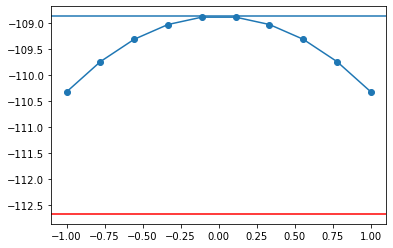

In [4]:
plt.plot(lvals, Es, 'o-')
plt.axhline(N2_only())
plt.axhline(CO_only(), color='red')